<a href="https://colab.research.google.com/github/sahilmurti07/ML_Projects/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding= "ISO-8859-1")

In [29]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [30]:
column_names = ["target","ids","date","flag","user","text"]

In [31]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv",names=column_names,encoding= "ISO-8859-1")


In [32]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [33]:
df.isnull().sum()

,0
target,0
ids,0
date,0
flag,0
user,0
text,0


In [34]:
df.shape

(1600000, 6)

In [35]:
df['target'].value_counts()

,count
target,
0,800000
4,800000


In [36]:
df.replace({'target':{4:1}},inplace=True)

In [37]:
df['target'].value_counts()

,count
target,
0,800000
1,800000


<Axes: xlabel='target', ylabel='count'>

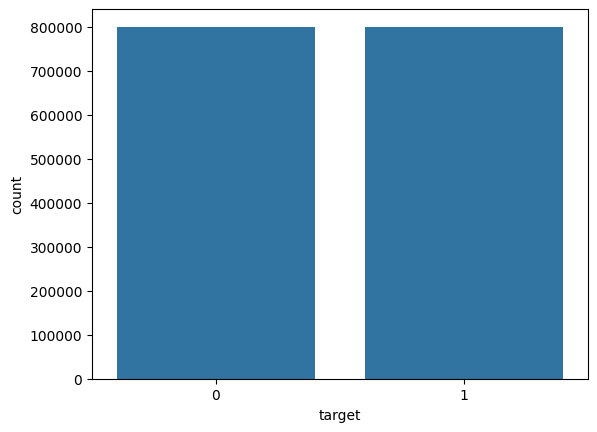

In [73]:
sns.countplot(x='target',data=df)

In [46]:
import nltk
from nltk import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)     # Remove punctuation/numbers, replace with space to avoid concatenating words
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if not word in stop]
    text = " ".join(text)
    return text

# Convert 'text' column to string type before applying the function
df['clean_text'] = df['text'].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
x= df['clean_text'].values
y = df['target'].values

In [48]:
print(x)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [49]:
print(y)

[0 0 0 ... 1 1 1]


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [51]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [52]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9453092 stored elements and shape (1280000, 461488)>
  Coords	Values
  (0, 436713)	0.27259876264838384
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.18709338684973031
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.2028971570399794
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.4456939372299574
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277744
  (12

In [53]:
print(y_train)

[1 1 0 ... 1 1 0]


In [56]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)


LogisticRegression()

In [57]:
X_train_pred = lg_model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,X_train_pred)

In [58]:
print("Accurracy:",training_data_accuracy)

Accurracy: 0.79871953125


In [59]:
X_test_pred = lg_model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,X_test_pred)

In [60]:
print("Accurracy:",test_data_accuracy)

Accurracy: 0.77668125


In [55]:
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test,y_pred))

Naive Bayes Accuracy: 0.755815625


In [61]:
import pickle

In [62]:
filename = "trained_model.sav"
pickle.dump(lg_model,open(filename,'wb'))

In [64]:
loaded_mmodel = pickle.load(open("/content/trained_model.sav","rb"))

In [70]:
X_new = X_test[5]
print(y_test[5])
prediction = lg_model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print("Negative")
else:
  print("positive")

0
[0]
Negative
